# Data Preprocessing & Training the CNN Model

Importing Classes..........
0
1


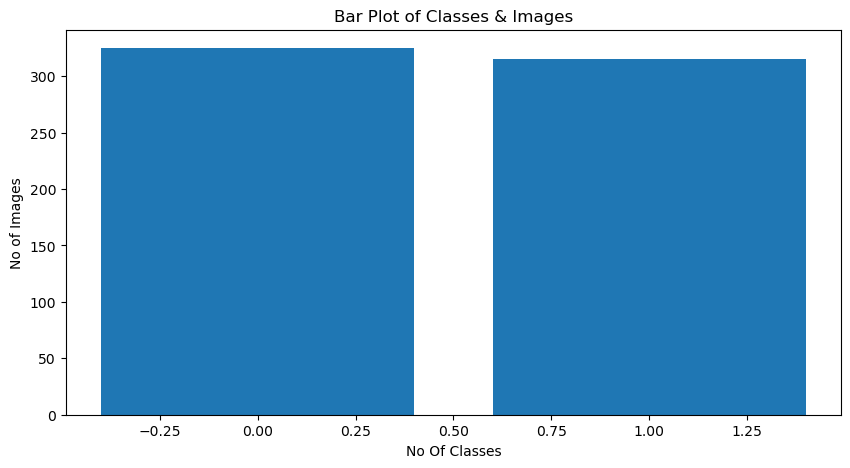

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                 │ (None, 30, 30, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_17 (Conv2D)                 │ (None, 28, 28, 32)            │       9,248 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_8 (MaxPooling2D)     │ (None, 14, 14, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_18 (Conv2D)                 │ (None, 12, 12, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_19 (Conv2D)                 │ (None, 10, 10, 64)            │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_9 (MaxPooling2D)     │ (None, 5, 5, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_8 (Dropout)                │ (None, 5, 5, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_4 (Flatten)                │ (None, 1600)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_8 (Dense)                    │ (None, 64)                    │     102,464 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_9 (Dropout)                │ (None, 64)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_9 (Dense)                    │ (None, 2)                     │         130 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 167,586 (654.63 KB)

 Trainable params: 167,586 (654.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5592 - loss: 0.6424 - val_accuracy: 0.5217 - val_loss: 0.6670
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.5996 - loss: 0.6126 - val_accuracy: 0.9938 - val_loss: 0.4725


In [8]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

# Your code continues...
#from keras.models import Sequential
#from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
#from keras.optimizers import Adam

def myModel():
    model = Sequential()

    # ... (your model architecture)

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from keras.optimizers import Adam
########################################

path="C:\\Users\\shiva\\Desktop\\facemaskd\\images\\images"
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(32,32,3)

#########################################

myList=os.listdir(path)

numOfClasses=len(myList)

# print(numOfClasses)

print("Importing Classes..........")
for x in range(0, numOfClasses):
    myPicList=os.listdir(path+"/"+str(x))
    # myData/0/img.jpg
    for y in myPicList:
        curImg=cv2.imread(path+"/"+str(x)+"/"+y)
        curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
        images.append(curImg)
        classNo.append(x)
    print(x)

images=np.array(images)
classNo=np.array(classNo)




#########Spliting The Data###########

x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)


# # print(x_train.shape)

numOfSample=[]

for x in range(0,numOfClasses):
    
    numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()


def preprocessing(img):
    # img=np.astype("uint8")
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))





x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)


# def myModel():
#     model = Sequential()

#     # ... (your model architecture)

#     model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model



def myModel():
    sizeOfFilter1=(3,3)
    sizeOfFilter2=(3,3)
    sizeOfPool=(2,2)

    model=Sequential()
    model.add((Conv2D(32, sizeOfFilter1, input_shape=(imgDimension[0],imgDimension[1],1),activation='relu')))
    model.add((Conv2D(32, sizeOfFilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))

    model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
    model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(numOfClasses, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model=myModel()
print(model.summary())

# history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),
#     steps_per_epoch=1000,
#     epochs=2,
#     validation_data=(x_validation,y_validation),
#     shuffle=1)
history = model.fit(
    dataGen.flow(x_train, y_train, batch_size=50),
    steps_per_epoch=1000,
    epochs=2,
    validation_data=(x_validation, y_validation),
    shuffle=1
)

model.save("MyTrainingModel.keras")


In [2]:
pip install open-cv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement open-cv (from versions: none)
ERROR: No matching distribution found for open-cv


In [3]:
pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.6 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.3/38.6 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.5/38.6 MB 2.7 MB/s eta 0:00:15
   - -------------------------------------- 1.0/38.6 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.6 MB 4.3 MB/s eta 0:00:09
   - -------------------------------------- 1.3/38.6 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.6 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.6 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.6 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.6 MB 3.0 MB/s eta 0:00:13
   - ------

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras in c:\users\shiva\anaconda3\new folder\lib\site-packages (2.15.0)
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     ----------- --------------------------- 30.7/101.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 101.3/101.3 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.0 MB 4.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.0 MB 6.0 MB/s eta 0:00:01
   ----------------------------------- ---- 0.9/1.0 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/240.6 kB ? eta -:--:--
   --------------------------------------- 240.6/240.6 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.
